In [1]:
import os

import numpy as np
import pandas as pd

from TrackML.dataset import load_event
from TrackML.randomize import shuffle_hits
from TrackML.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
event_prefix = 'event000001000'
hits, cells, particles, truth = load_event(os.path.join('data/train_100_events', event_prefix))

In [3]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [4]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [5]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [6]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [7]:
volumes = hits['volume_id'].unique()
layers = hits.layer_id.unique()

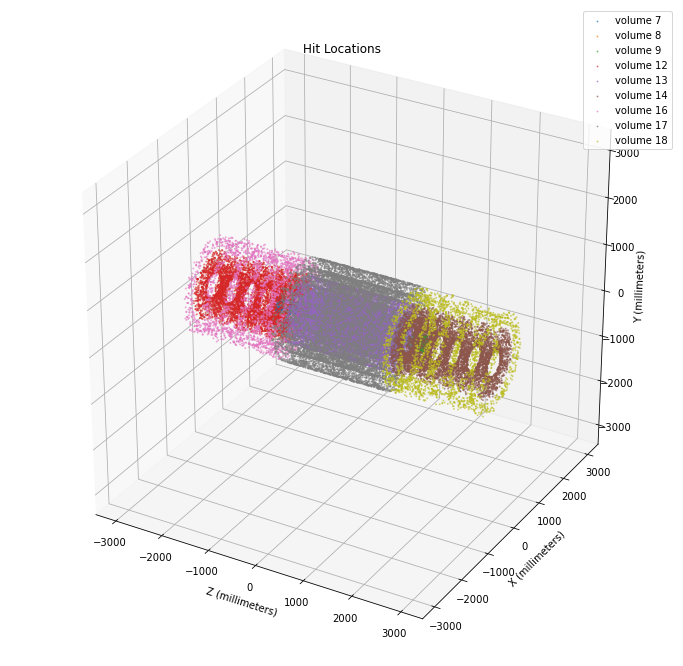

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
ax.legend()
plt.show()

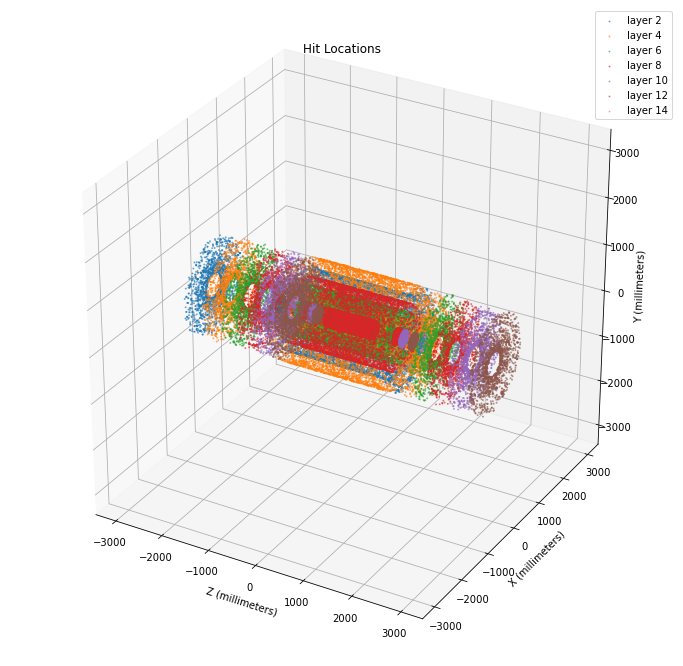

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for layer in layers:
    v = hits[hits.layer_id == layer]
    ax.scatter(v.z, v.x, v.y, s=1, label='layer {}'.format(layer), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
ax.legend()
plt.show()

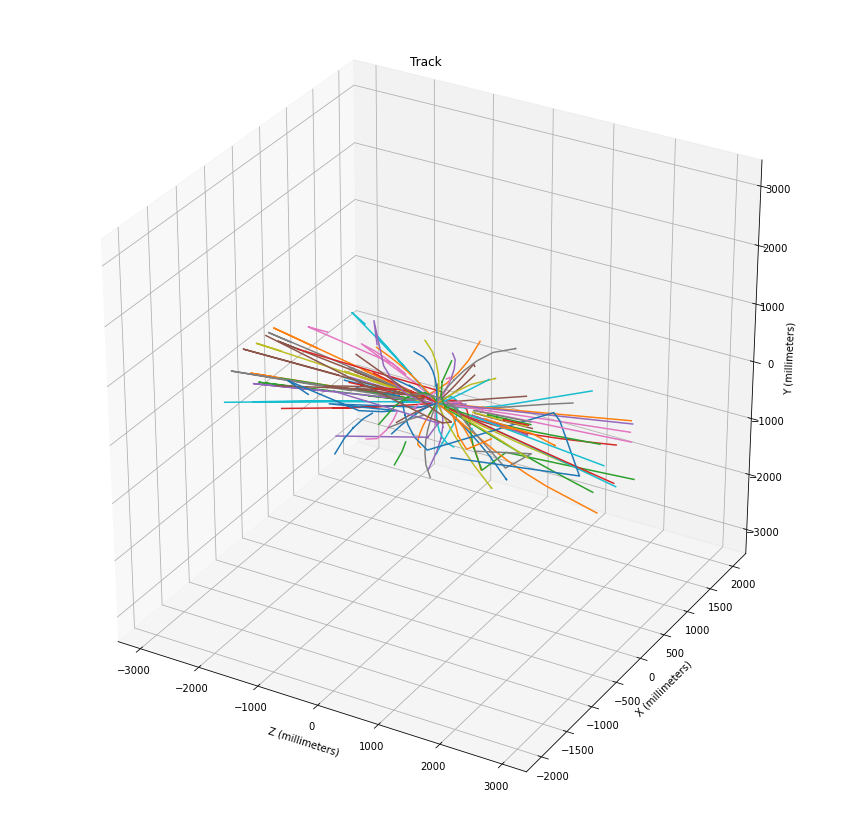

In [10]:
tracks = truth.particle_id.unique()[1::100]

plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)
ax.set_title('Track')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.scatter(2000,2000,3000, s=0)
ax.scatter(-2000,-2000,-3000, s=0)
plt.show()    

In [11]:
truth[truth.particle_id == tracks[0]]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.4922,0.000010
1419,1420,22525763437723648,-55.154400,0.621779,-1497.5,-0.569794,0.027264,-15.4928,0.000008
1459,1460,22525763437723648,-47.988098,0.315591,-1302.5,-0.568883,0.021994,-15.4929,0.000006
3169,3170,22525763437723648,-47.804100,0.308733,-1297.5,-0.571445,0.020847,-15.4933,0.000005
3233,3234,22525763437723648,-40.626099,0.087326,-1102.5,-0.569940,0.015274,-15.4934,0.000005
5342,5343,22525763437723648,-40.442200,0.082538,-1097.5,-0.570204,0.013872,-15.4940,0.000006
5423,5424,22525763437723648,-35.475899,-0.024284,-962.5,-0.569773,0.010668,-15.4940,0.000009
5481,5482,22525763437723648,-35.310101,-0.027160,-958.0,-0.571644,0.008881,-15.4949,0.000011
7866,7867,22525763437723648,-35.291698,-0.027451,-957.5,-0.571617,0.009012,-15.4950,0.000014
7950,7951,22525763437723648,-30.315399,-0.095482,-822.5,-0.570993,0.006231,-15.4951,0.000016


In [12]:
hits = hits.merge(cells, on='hit_id', how='left')

In [13]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value
0,1,-64.409897,-7.163700,-1502.5,7,2,1,209,617,0.013832
1,1,-64.409897,-7.163700,-1502.5,7,2,1,210,617,0.079887
2,1,-64.409897,-7.163700,-1502.5,7,2,1,209,618,0.211723
3,2,-55.336102,0.635342,-1502.5,7,2,1,68,446,0.334087
4,3,-83.830498,-1.143010,-1502.5,7,2,1,58,954,0.034005


# Pruebas

### Clustering

In [14]:
from tqdm import tqdm, tqdm_notebook

In [15]:
rest = hits.copy()
rest['track_len'] = 1
rest['track_id'] = -rest.index
rest['kt'] = 1e-6
rest['z0'] = 0

rest['sensor'] = rest.volume_id + 100*rest.layer_id + 100000*rest.module_id
rest['layer'] = rest.volume_id + 100*rest.layer_id

In [16]:
rest.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value,track_len,track_id,kt,z0,sensor,layer
0,1,-64.409897,-7.163700,-1502.5,7,2,1,209,617,0.013832,1,0,0.000001,0,100207,207
1,1,-64.409897,-7.163700,-1502.5,7,2,1,210,617,0.079887,1,-1,0.000001,0,100207,207
2,1,-64.409897,-7.163700,-1502.5,7,2,1,209,618,0.211723,1,-2,0.000001,0,100207,207
3,2,-55.336102,0.635342,-1502.5,7,2,1,68,446,0.334087,1,-3,0.000001,0,100207,207
4,3,-83.830498,-1.143010,-1502.5,7,2,1,58,954,0.034005,1,-4,0.000001,0,100207,207


In [17]:
d =    {'sint':[225,110,110],
        'cost':[225,110,110],
          'phi':[550,260,260],
        'min_group':[11,11,10],
        'npoints':[250,1250,500]}
filters = pd.DataFrame(d)
filters.head()

,sint,cost,phi,min_group,npoints
0,225,225,550,11,250
1,110,110,260,11,1250
2,110,110,260,10,500


In [18]:
maxprog = filters.npoints.sum()
rest['pre_track_id'] = rest.track_id
p = -1
stds={'z0':7.5, 'kt':7.5e-4}

#### Calc Features

In [19]:
def calc_features(hits, hipos, phik=3.3): # add phik
    if 'rr' not in list(hits.columns):
        hits['theta_'] = np.arctan2(hits.y, hits.x)
        hits['rr'] = np.sqrt(np.square(hits.y) + np.square(hits.x))
    ktrr = hipos.kt * hits.rr
    hits['dtheta'] = np.where(np.abs(ktrr) < 1, np.arcsin(ktrr, where=np.abs(ktrr)<1), ktrr)
    hits['theta'] = hits.theta_ + hits.dtheta
    hits['phi'] = np.arctan((hits.z - hipos.z0) * hipos.kt / (hits.dtheta * phik)) * 2.05 /np.pi
    hits['sint'] = np.sin(hits.theta)
    hits['cost'] = np.cos(hits.theta)
    hits['fault'] = (np.abs(ktrr) > 1).astype(np.int8)

#### Sparse bin

In [20]:
def tag_bins(cat):
    un, bin_tag, cnt = np.unique(cat, return_inverse=True, return_counts=True)
    return bin_tag, cnt[bin_tag]

In [21]:
tag_bins((np.random.randn(100) * 10).astype('int64'))

(array([15, 19, 15, 16, 28, 20,  7,  2, 16, 16, 17,  7, 15, 25, 16, 15, 29,
        13, 22,  9, 29, 11, 12, 15, 16, 12,  0, 19, 11, 13, 16, 17, 16,  9,
        13, 18, 32, 26, 29, 23, 20, 17,  5, 22, 21,  1, 14,  8, 10, 33, 21,
        16, 23, 24, 16, 28, 19,  7,  5, 17,  6, 24, 13,  9, 18, 30, 17, 16,
         9, 28, 18, 14, 17, 17,  8, 30, 16, 29,  7, 15, 25, 17, 20, 13, 19,
        12,  7, 17,  4, 27,  3, 26, 10, 19,  5, 19, 31, 18, 24, 27]),
 array([ 6,  6,  6, 11,  3,  3,  5,  1, 11, 11,  9,  5,  6,  2, 11,  6,  4,
         5,  2,  4,  4,  2,  3,  6, 11,  3,  1,  6,  2,  5, 11,  9, 11,  4,
         5,  4,  1,  2,  4,  2,  3,  9,  3,  2,  2,  1,  2,  2,  2,  1,  2,
        11,  2,  3, 11,  3,  6,  5,  3,  9,  1,  3,  5,  4,  4,  2,  9, 11,
         4,  3,  4,  2,  9,  9,  2,  2, 11,  4,  5,  6,  2,  9,  3,  5,  6,
         3,  5,  9,  1,  2,  1,  2,  2,  6,  3,  6,  1,  4,  3,  2]))

In [22]:
def sparse_bin(features, bin_num, randomize=True, fault=None):
    err = np.random.randn(features.shape[1]) * randomize
    cat = np.zeros(features.shape[0]).astype('int64')
    factore = 1
    for i, feat in enumerate(features.columns):
        cat += (features[feat] * bin_num._asdict()[feat] + err[i]).astype('int64') * factore
        factore *= 2 * bin_num._asdict()[feat] + 1
    if fault is not None:
        cat += (factore * features.index * fault).astype('int64')
    return tag_bins(cat)

In [ ]:
label_shift_M=1000000
p = -1
nu = 250
phik = 3.3
weights={'phi':1, 'theta':0.15}
res_list = []
pbar = tqdm(total=maxprog,mininterval=5.0)

for filt in filters.itertuples():
    test_points = pd.DataFrame()
    for col in stds:
        test_points[col] = np.random.normal(scale=stds[col], size=filt.npoints)
    for row in test_points.itertuples():
        pbar.update()
        p += 1
        calc_features(rest, row, phik)
        feat = ['phi', 'sint', 'cost']
        rest['new_track_id'], rest['new_track_len'] = sparse_bin(rest[feat], filt, fault=rest.fault)
        rest['new_track_id'] += (p + 1) * label_shift_M
        better = (rest['new_track_len'] > rest['track_len']) & (rest['new_track_len'] < 19)
        rest['new_track_id'] = rest['new_track_id'].where(better, rest['track_id'])
        dum, rest['new_track_len'] = tag_bins(rest['new_track_id'])
        better = (rest['new_track_len'] > rest['track_len']) & (rest['new_track_len'] < 19)
        rest['track_id'] = rest['track_id'].where(~better, rest['new_track_id'])
        rest['track_len'] = rest['track_len'].where(~better, rest['new_track_len'])
        rest['kt'] = rest['kt'].where(~better, row.kt)
        rest['z0'] = rest['z0'].where(~better, row.z0)
        
        if (row.Index + 1) % nu == 0 or (row.Index + 1) == test_points.shape[0]:
            # outlier removal
            dum, rest['track_len'] = tag_bins(rest['track_id'])
            calc_features(rest, rest[['kt', 'z0']], phik)
            
            gp = rest.groupby('track_id').agg({
                'phi': np.mean, 'sint': np.mean, 'cost': np.mean
            }).rename(columns={'phi': 'mean_phi', 'sint': 'mean_sint', 'cost': 'mean_cost'}).reset_index()
            cols_drop = rest.columns.intersection(gp.columns).drop('track_id')
            rest = rest.drop(cols_drop, axis=1).reset_index().merge(gp, on='track_id', how='left').set_index('index')
            
            rest['dist'] = (weights['theta'] * np.square(rest['sint'] - rest['mean_sint']) +
                           weights['theta'] * np.square(rest['cost'] - rest['mean_cost']) +
                           weights['phi'] * np.square(rest['phi'] - rest['mean_phi']))
            rest = rest.sort_values('dist')
            rest['closest'] = rest.groupby(['track_id', 'sensor'])['dist'].cumcount()
            rest['closest2'] = rest.groupby(['track_id', 'layer'])['dist'].cumcount()
            select = (rest['closest'] != 0) | (rest['closest2'] > 2)
            rest['track_id'] = rest['track_id'].where(~select, rest['pre_track_id'])
            dum, rest['track_len'] = tag_bins(rest['track_id'])
            
            select = rest['track_len'] > filt.min_group
            tm = rest[select][['hit_id', 'track_id', 'kt', 'z0']].copy()
            res_list.append(tm)
            dum, rest['track_len'] = tag_bins(rest['track_id'])
            rest['pre_track_id'] = rest['track_id'] 

res_list.append(rest[['hit_id', 'track_id', 'kt', 'z0']].copy())
res = pd.concat(res_list, ignore_index=True)
pbar.close()

 11%|█▏        | 229/2000 [00:51<06:39,  4.43it/s]